# Analyzing Penguins Data

**Table of contents**    
- Importing Libraries    
- Loading the data, data cleaning    
  - Replacing missing data with median    
  - Dropping NaNs from sex column    
- Data visualization    
  - Bill length, bill depth, flipper length, body mass by species - distributions    
  - Bill length, bill depth, flipper length, body mass by island - distributions    
  - Bill length, bill depth, flipper length, body mass by island, species and sex - boxplots    
- Linear model    
  - Modelling body mass    
  - Train sample model metrics    
- Using the model on the test sample    
  - Predicting body mass values    
  - Test sample model metrics    
  - Interpretation    
  - Calculating and standarizing residuals    
  - Residual plot    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=false
	flat=false
	minLevel=3
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

### Importing Libraries

In [175]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, skew, kurtosis
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

### Loading the data, data cleaning

In [176]:
df = sns.load_dataset('penguins')

In [177]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [178]:
df.isna().sum().sort_values(ascending=False)

sex                  11
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
species               0
island                0
dtype: int64

In [179]:
df[df.loc[:,['sex','bill_length_mm','bill_depth_mm','flipper_length_mm']].isna().any(axis=1)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


In [180]:
for column in ['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']:
    print(f'{column} median: {df[column].median()}')

bill_length_mm median: 44.45
bill_depth_mm median: 17.3
flipper_length_mm median: 197.0
body_mass_g median: 4050.0


#### Replacing missing data with median

In [181]:
def replace_nan_with_median(df,column):
    median_value = df.loc[:,column].median()
    df.loc[:,column] = df.loc[:,column].fillna(median_value)

In [182]:
for column in ['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']:
    replace_nan_with_median(df=df,column=column)

In [183]:
df[df.loc[:,['sex','bill_length_mm','bill_depth_mm','flipper_length_mm']].isna().any(axis=1)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,44.45,17.3,197.0,4050.0,NaN
8,Adelie,Torgersen,34.10,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.00,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.80,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.80,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.50,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.50,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.20,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.30,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.50,15.7,217.0,4875.0,NaN


#### Dropping NaNs from sex column

In [184]:
df = df.dropna(subset='sex')
print(np.sum(df.isna().sum()))

0


### Data visualization

#### Bill length, bill depth, flipper length, body mass by species - distributions

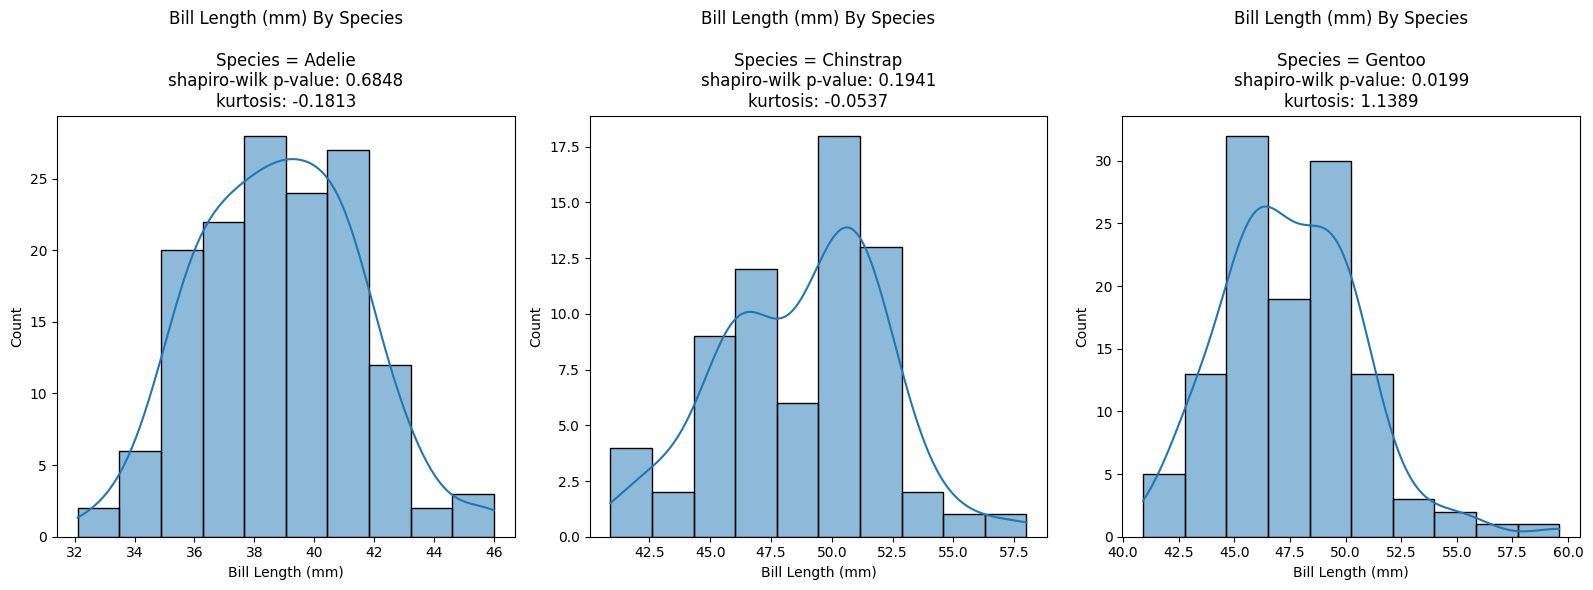

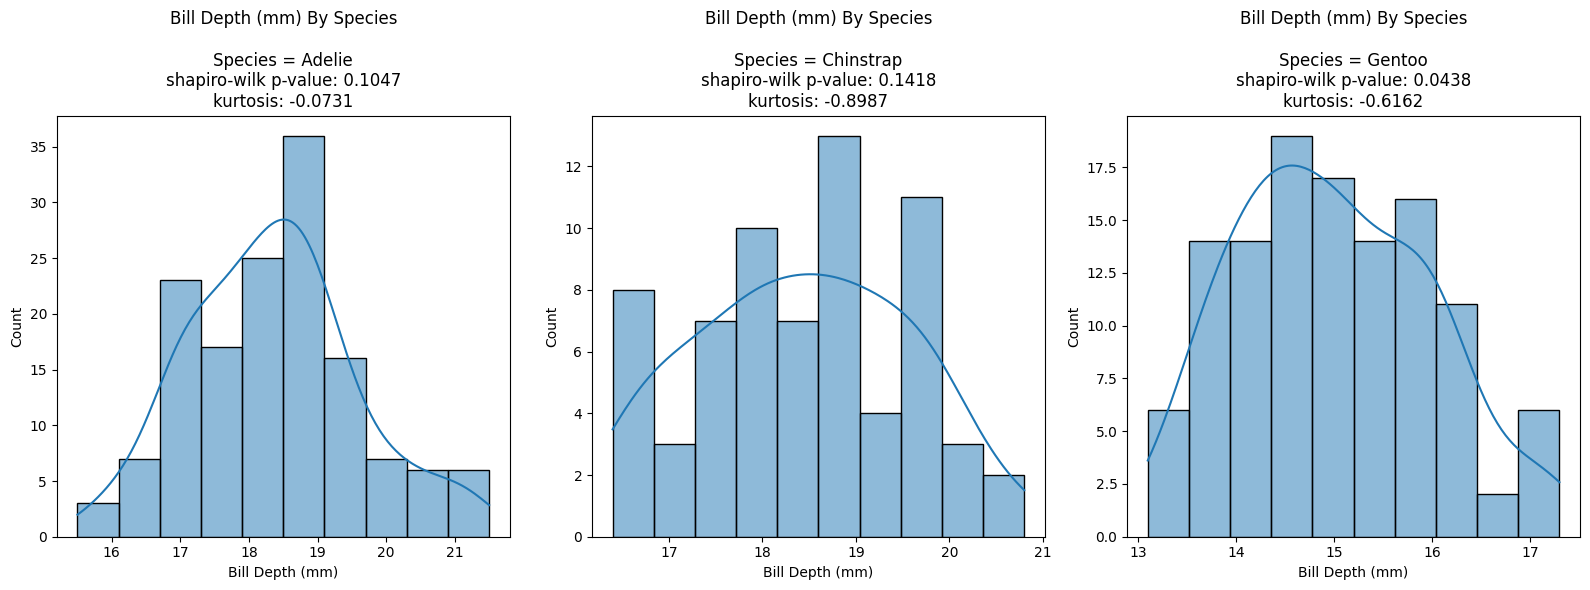

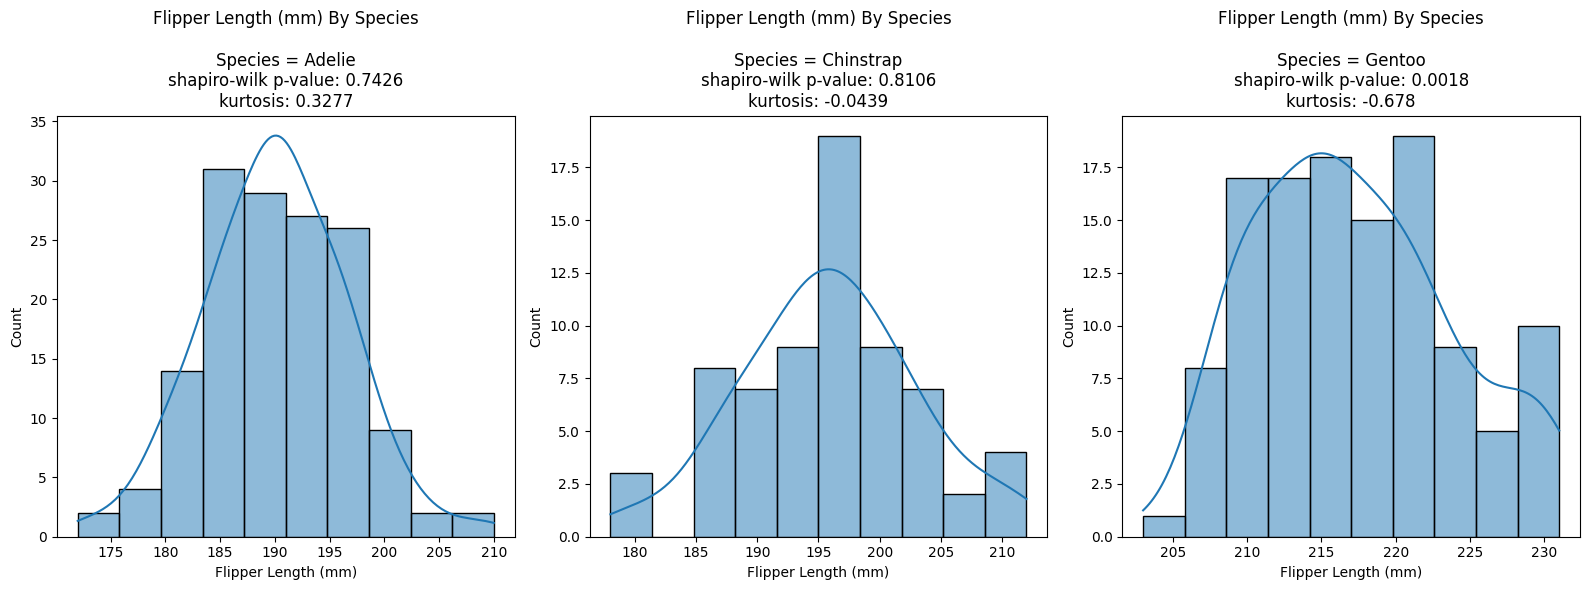

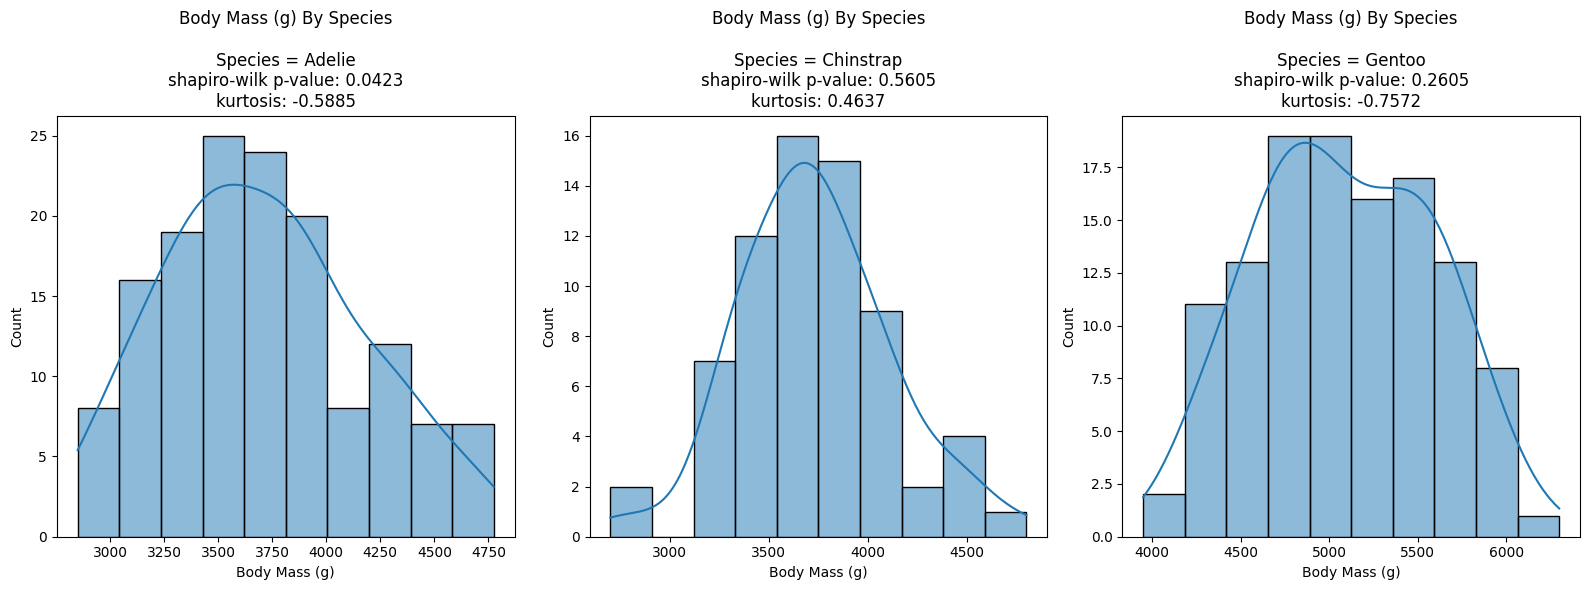

In [185]:
df.columns = [column.replace('_',' ').title().replace('Mm','(mm)').replace(' G',' (g)') for column in df.columns]
features = df.select_dtypes(np.number).columns.to_list()

for feature in features:
    fig, axes = plt.subplots(1, 3, figsize=(16, 6))
    for index, species_name in enumerate(df['Species'].unique()):
        subset_data = df[df['Species'] == species_name].loc[:,feature]
        sns.histplot(data=subset_data, x=subset_data, kde=True, ax=axes[index], bins=10)  # Use the feature as 'x'
        p_value = round(shapiro(subset_data)[1], 4)
        kurt = round(kurtosis(subset_data), 4)
        title = f'{feature} By Species\n\nSpecies = {species_name}\nshapiro-wilk p-value: {p_value}\nkurtosis: {kurt}'
        axes[index].set_title(title)
    plt.tight_layout()
    plt.show()

#### Bill length, bill depth, flipper length, body mass by island - distributions

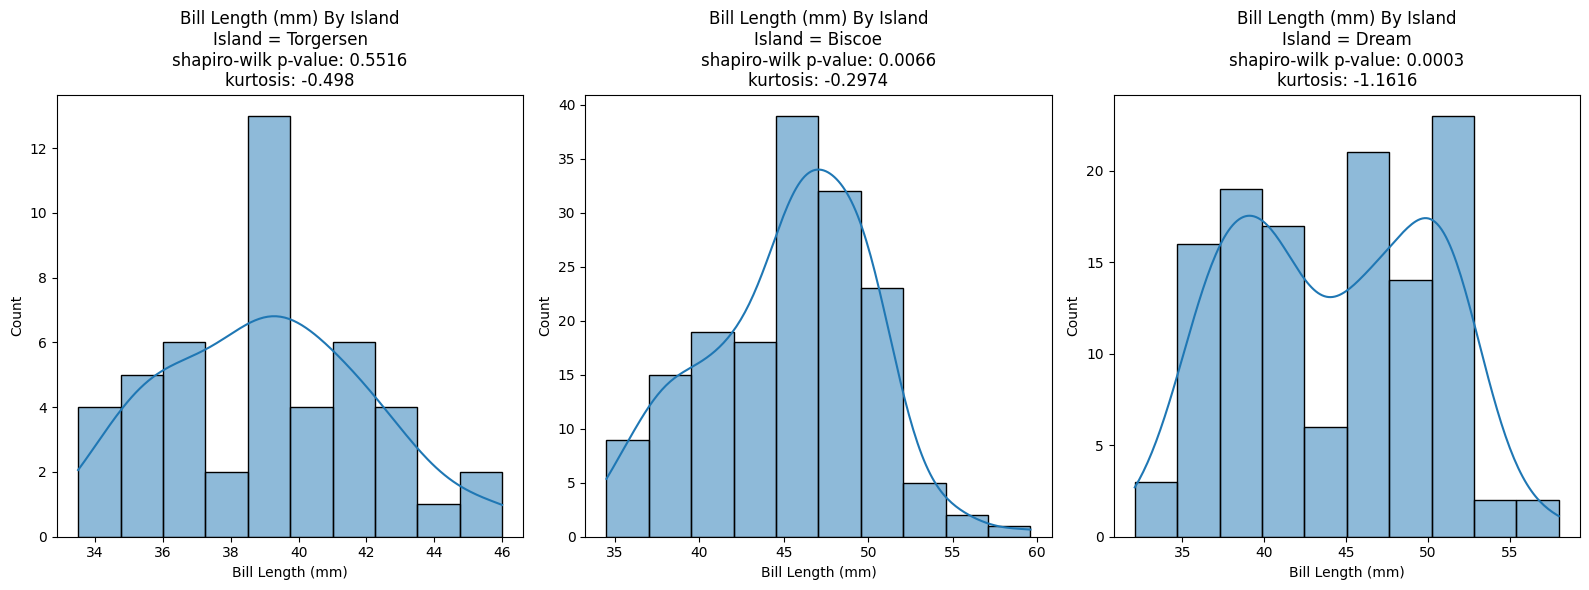

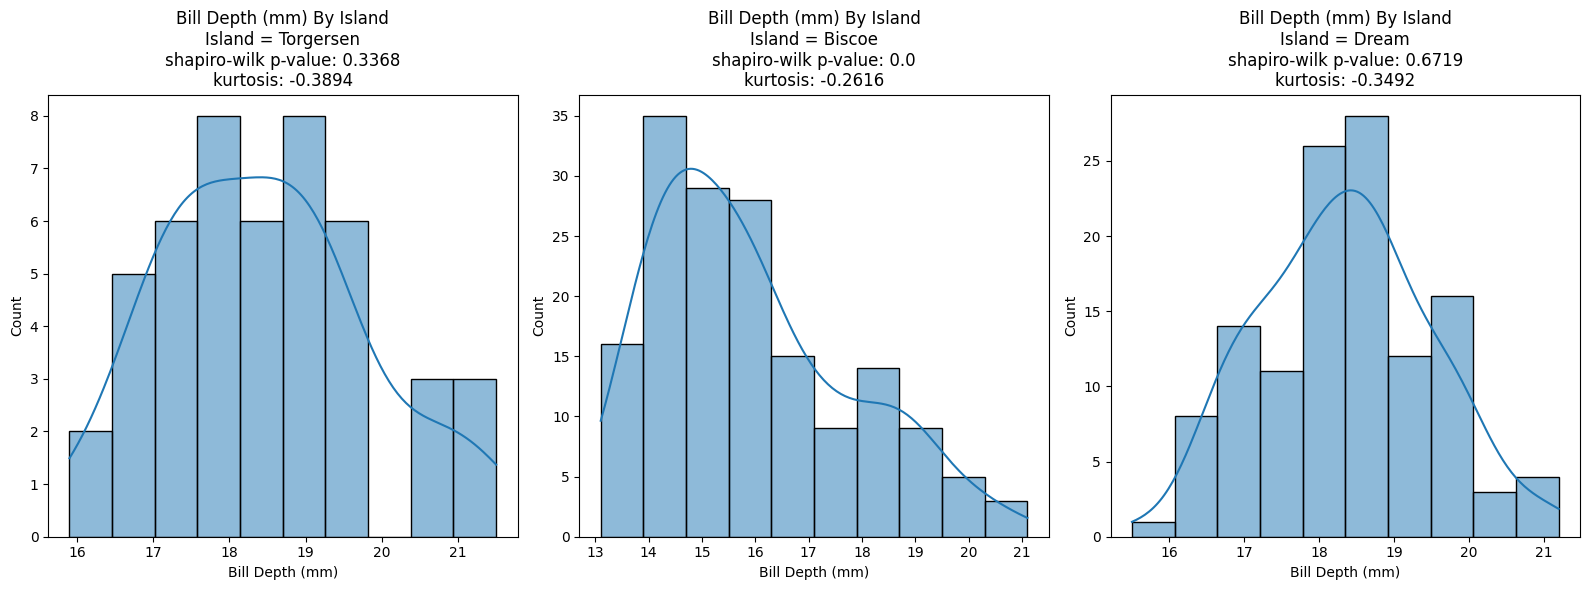

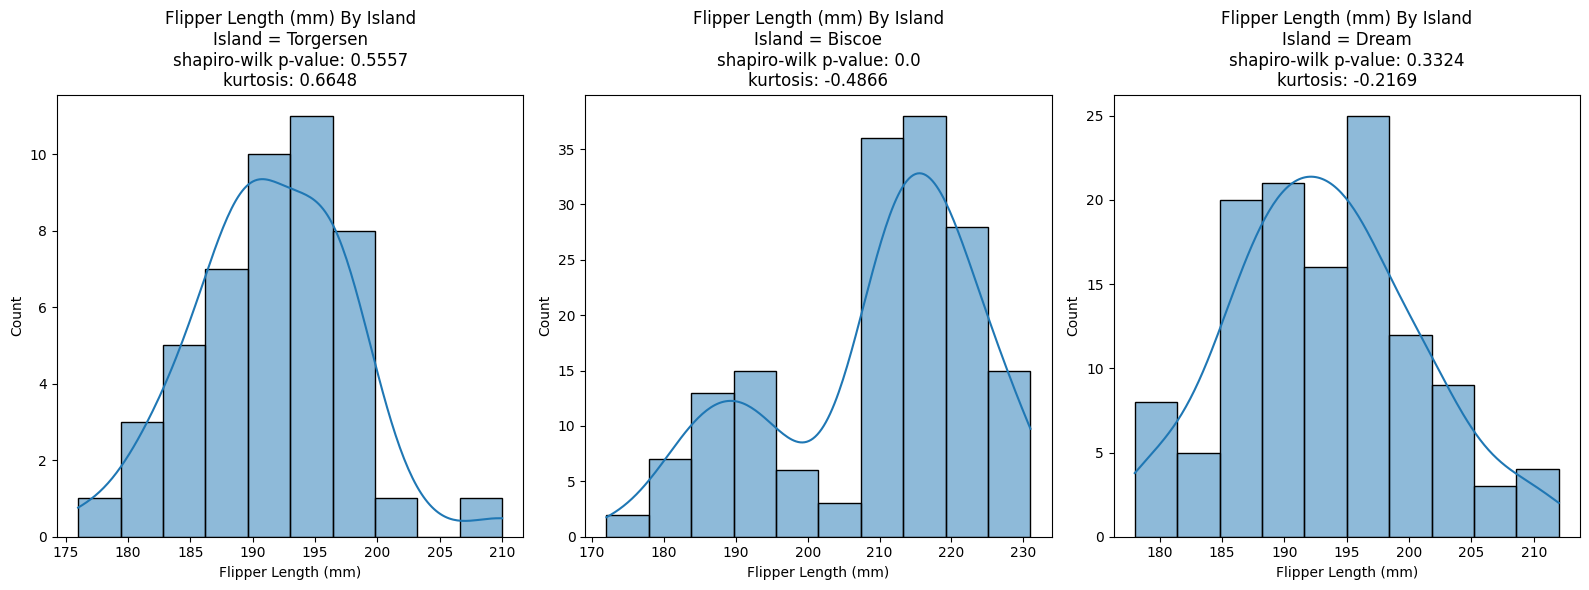

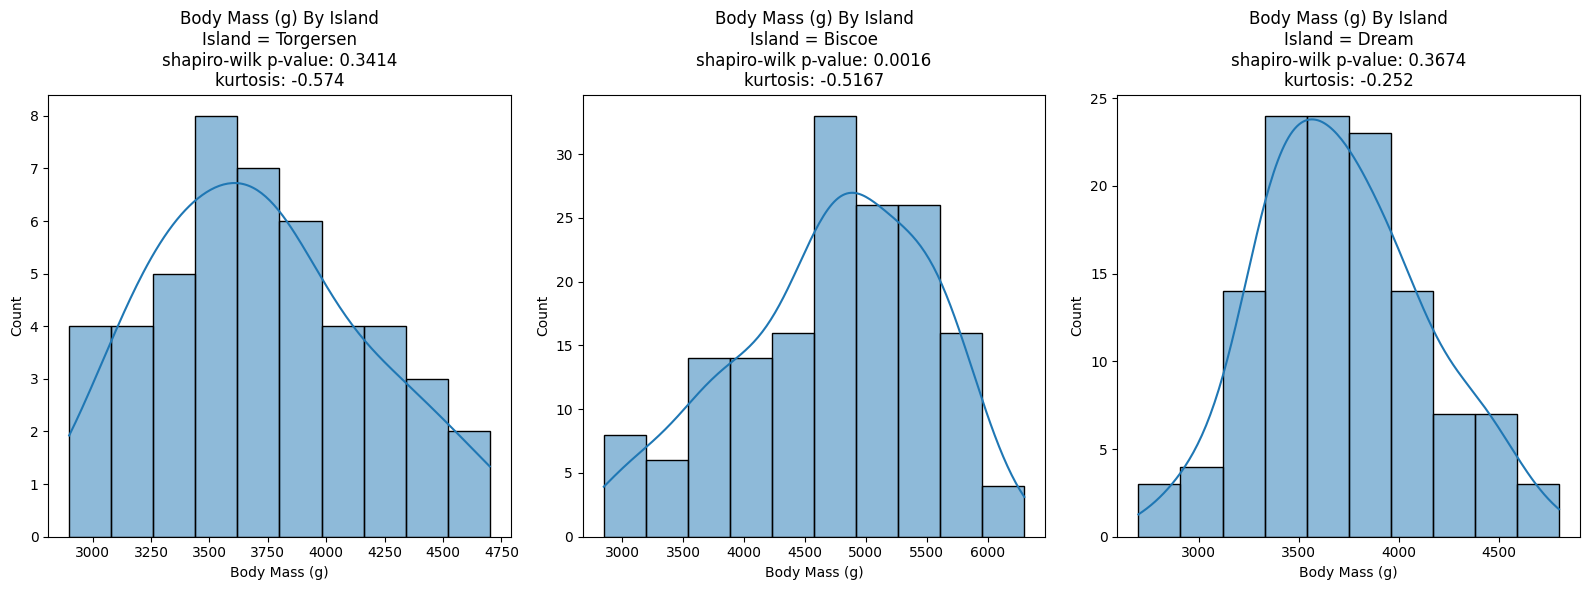

In [186]:
features = df.select_dtypes(np.number).columns.to_list()

for feature in features:
    fig, axes = plt.subplots(1, 3, figsize=(16, 6))
    for index, island_name in enumerate(df['Island'].unique()):
        subset_data = df[df['Island'] == island_name].loc[:,feature]
        sns.histplot(data=subset_data, x=subset_data, kde=True, ax=axes[index], bins=10)  # Use the feature as 'x'
        p_value = round(shapiro(subset_data)[1], 4)
        kurt = round(kurtosis(subset_data), 4)
        title = f'{feature} By Island\nIsland = {island_name}\nshapiro-wilk p-value: {p_value}\nkurtosis: {kurt}'
        axes[index].set_title(title)
    plt.tight_layout()
    plt.show()

#### Bill length, bill depth, flipper length, body mass by island, species and sex - boxplots

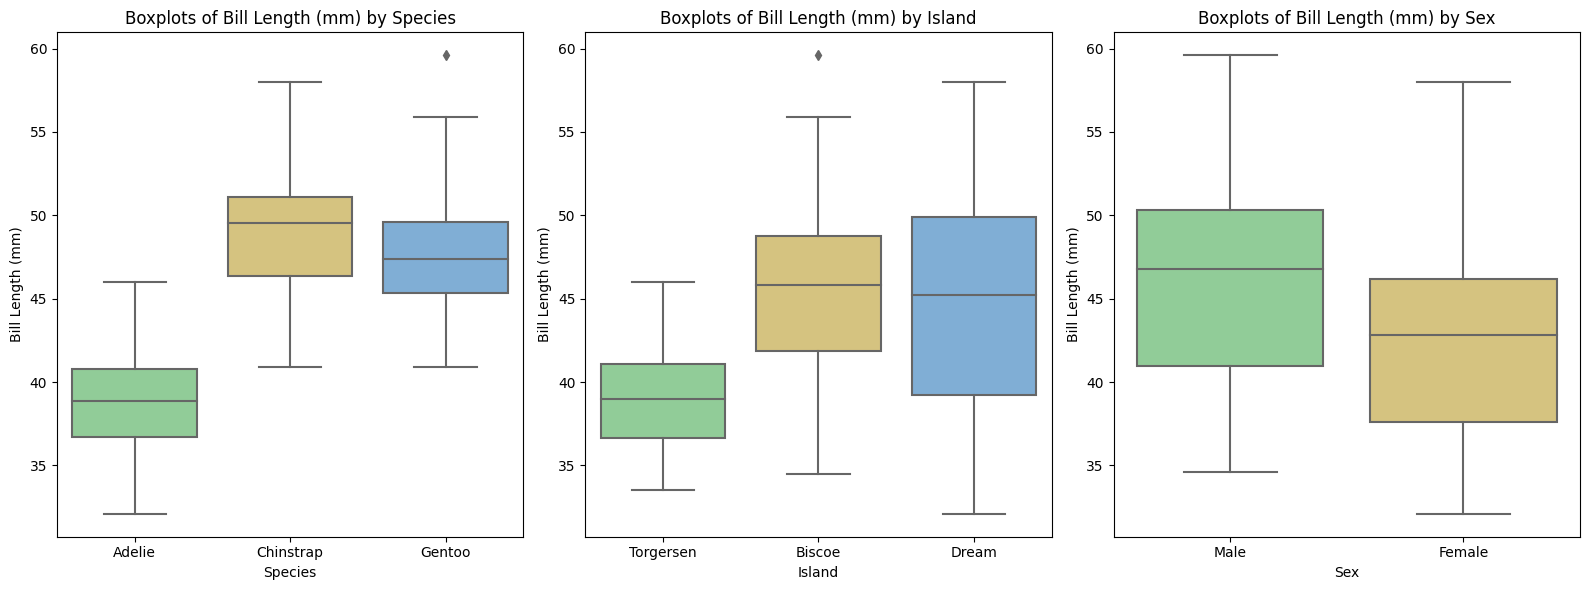

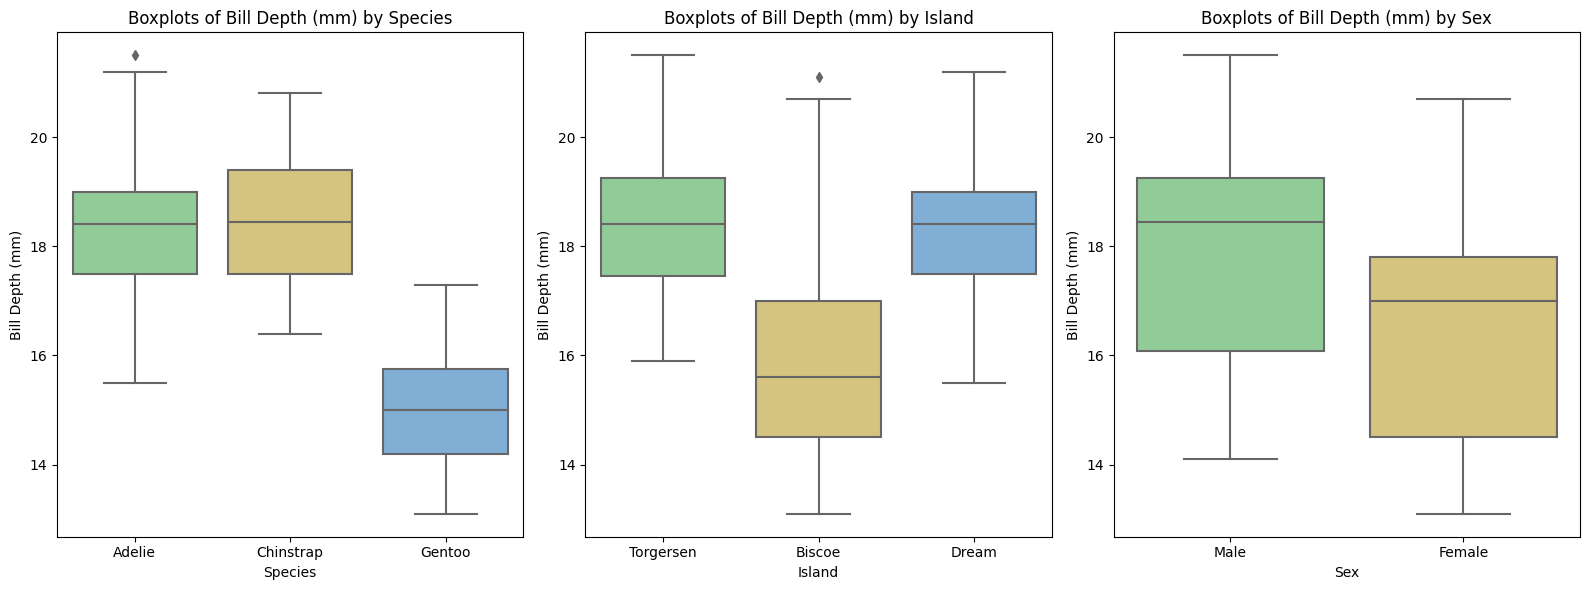

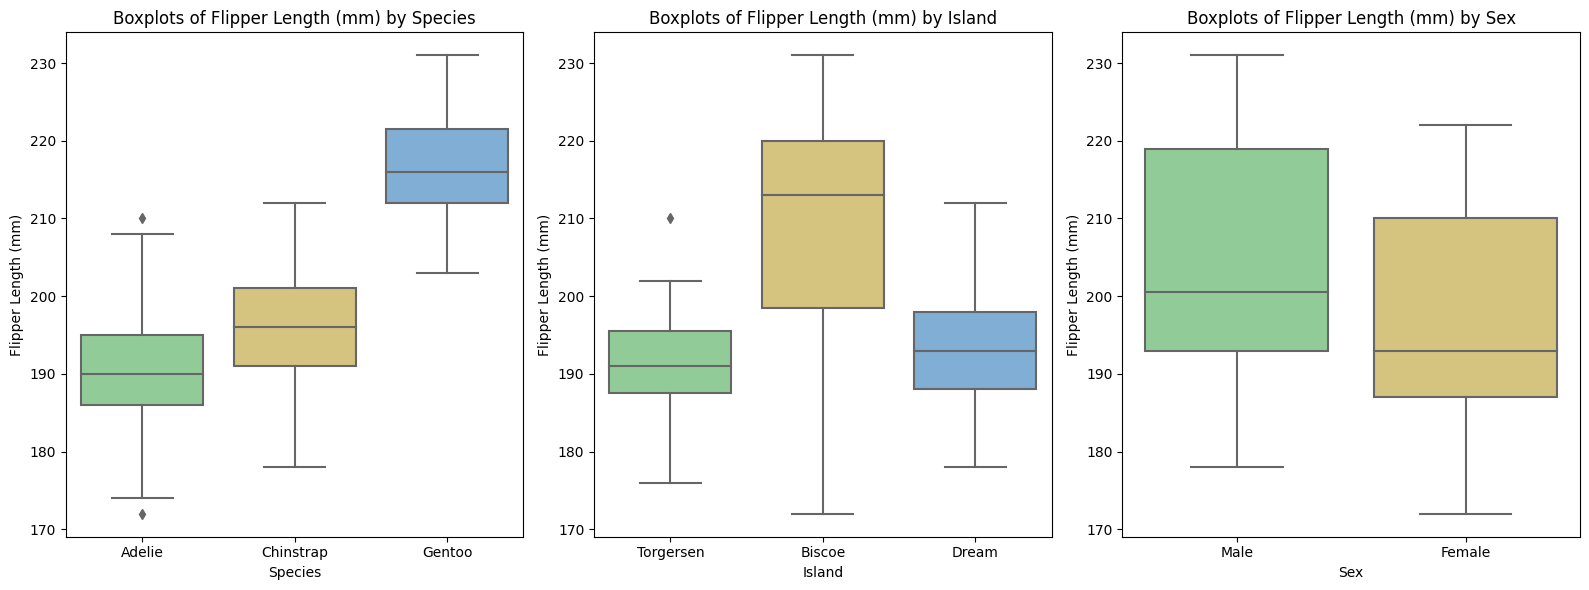

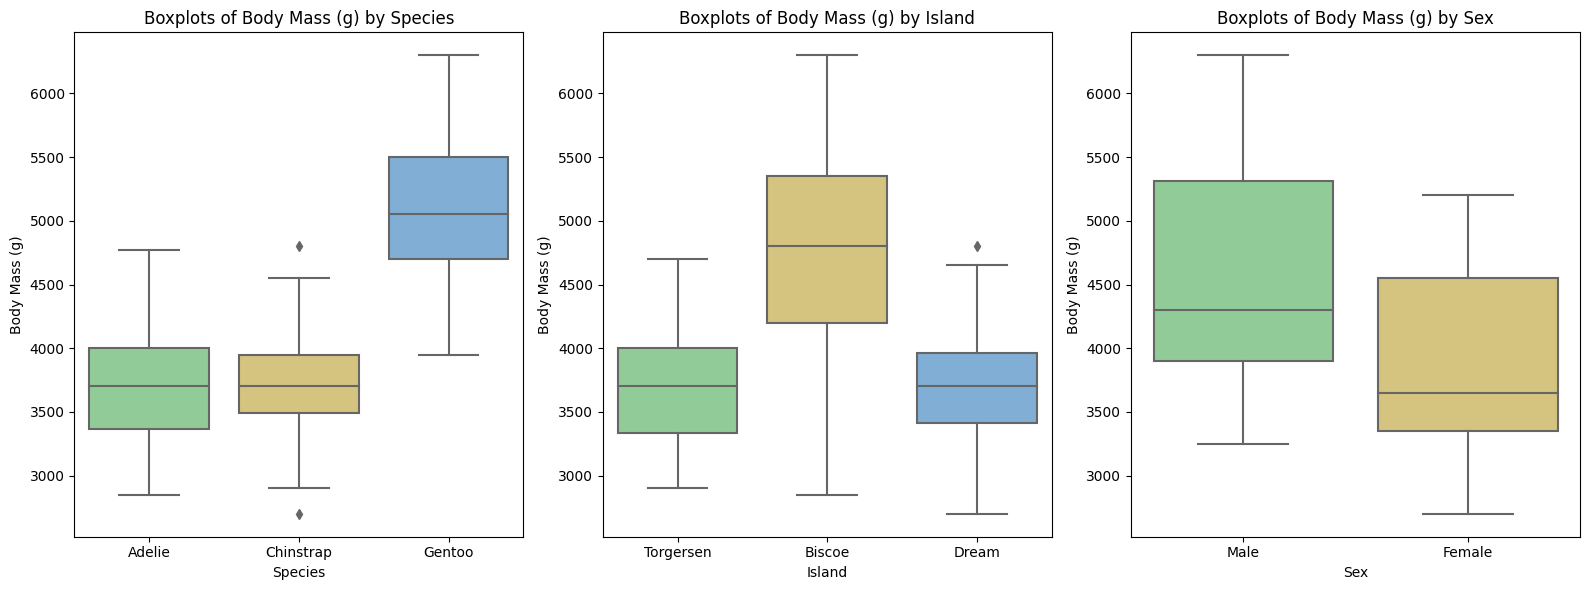

In [187]:
features = df.select_dtypes(np.number).columns.to_list()

for feature in features:
    fig,axes = plt.subplots(1,3,figsize=(16,6))
    
    for axes_index,column in enumerate(['Species','Island','Sex']):
        sns.boxplot(data=df,
                    x=column,
                    y=feature,
                    ax=axes[axes_index],
                    palette=sns.color_palette(['#87D690','#E3CB72','#72AFE3']))
        axes[axes_index].set_title(f'Boxplots of {feature} by {column}')

    plt.tight_layout()
    plt.show()

### Linear model

#### Modelling body mass

In [188]:
X = df.drop(['Body Mass (g)'],axis=1)
y = df['Body Mass (g)']

X = pd.get_dummies(X,columns=['Species','Island','Sex'],drop_first=True)

X=sm.add_constant(X)

X_train, X_test, y_train,y_test = train_test_split(X,y,train_size=0.75,random_state=123)
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (249, 9)
X_test shape: (84, 9)
y_train shape: (249,)
y_test shape: (84,)


In [189]:
X_train

,const,Bill Length (mm),Bill Depth (mm),Flipper Length (mm),Species_Chinstrap,Species_Gentoo,Island_Dream,Island_Torgersen,Sex_Male
59,1.0,37.6,19.1,194.0,0,0,0,0,1
27,1.0,40.5,17.9,187.0,0,0,0,0,0
201,1.0,49.8,17.3,198.0,1,0,1,0,0
195,1.0,45.5,17.0,196.0,1,0,1,0,0
58,1.0,36.5,16.6,181.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
89,1.0,38.9,18.8,190.0,0,0,1,0,0
22,1.0,35.9,19.2,189.0,0,0,0,0,0
236,1.0,42.0,13.5,210.0,0,1,0,0,0
104,1.0,37.9,18.6,193.0,0,0,0,0,0


In [190]:
mod = sm.OLS(y_train,X_train).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:          Body Mass (g)   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     223.9
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          1.04e-106
Time:                        14:00:58   Log-Likelihood:                -1755.1
No. Observations:                 249   AIC:                             3528.
Df Residuals:                     240   BIC:                             3560.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -2233.7476    

#### Train sample model metrics

In [191]:
print(f'Train sample R2 score: {round(r2_score(y_true = y_train, y_pred = mod.predict(X_train)),4)}')
print(f'Train sample MAE: {round(mean_absolute_error(y_true = y_train, y_pred = mod.predict(X_train)),4)}')
print(f'Train sample MAPE: {round(mean_absolute_percentage_error(y_true = y_train, y_pred = mod.predict(X_train)),4)}')

Train sample R2 score: 0.8818
Train sample MAE: 222.7067
Train sample MAPE: 0.055


1. 88.18% of the variance across body mass is captured by the model
2. On average, the model was wrong by 222.7067 while predicting body weight
3. The prediction was off by 5.5% on average

### Using the model on the test sample

#### Predicting body mass values

In [192]:
y_test_pred = mod.predict(X_test)
y_test_pred

111    4209.954452
158    3173.462636
288    4795.742279
308    4731.828745
185    4116.585341
          ...     
321    5791.756399
77     3726.980891
207    4038.337241
245    5176.173466
80     3241.416853
Length: 84, dtype: float64

#### Test sample model metrics

In [193]:
print(f'Test sample R2 score: {round(r2_score(y_true = y_test, y_pred = mod.predict(X_test)),4)}')
print(f'Test sample MAE: {round(mean_absolute_error(y_true = y_test, y_pred = mod.predict(X_test)),4)}')
print(f'Test sample MAPE: {round(mean_absolute_percentage_error(y_true = y_test, y_pred = mod.predict(X_test)),4)}')

Test sample R2 score: 0.8471
Test sample MAE: 242.6032
Test sample MAPE: 0.0593


#### Interpretation

1. 84.71% of the variance across body mass is captured by the model
2. On average, the model was wrong by 242.6032 while predicting body weight
3. The prediction was off by 5.93% on average

#### Calculating and standarizing residuals

In [194]:
residuals = y_test - y_test_pred
residuals

111    390.045548
158     76.537364
288    -95.742279
308    143.171255
185    -16.585341
          ...    
321   -191.756399
77     173.019109
207   -588.337241
245    -76.173466
80     -41.416853
Length: 84, dtype: float64

In [195]:
def standarize_residuals(x):
    mean_residual = np.mean(residuals)
    std_residual = np.std(residuals)
    x = (x-mean_residual)/std_residual
    return x

In [196]:
standarized_residuals = standarize_residuals(residuals)
standarized_residuals

111    1.150543
158    0.118119
288   -0.449221
308    0.337553
185   -0.188546
         ...   
321   -0.765408
77     0.435846
207   -2.071402
245   -0.384778
80    -0.270320
Length: 84, dtype: float64

#### Residual plot

Text(0.5, 1.0, 'Residual Plot')

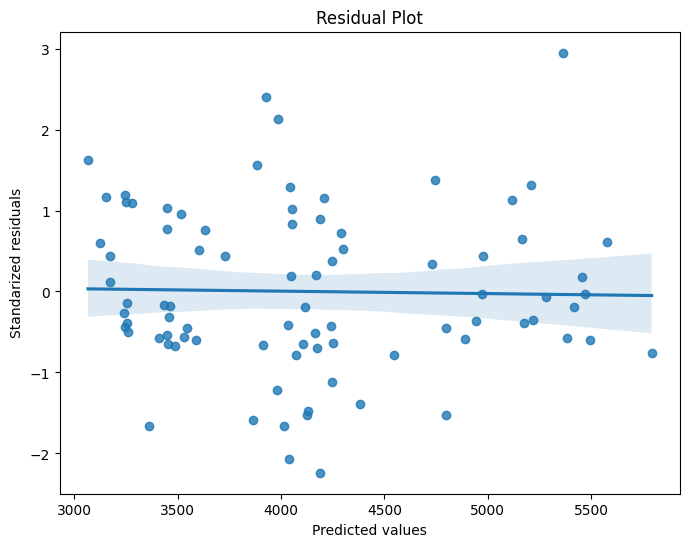

In [197]:
plt.figure(figsize=(8,6))
sns.regplot(x=y_test_pred,y=standarized_residuals)
plt.xlabel('Predicted values')
plt.ylabel('Standarized residuals')
plt.title('Residual Plot')